# CASTIEL CHILDREN PARK

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

### INTRODUCTION <a name="introduction"></a>

**The Problem**
They say “all work and no play make Jack a boy”. It is widely known that kids from India are always keen about education especially tech related, and spend a most of their childhood studying for a better future. However, it is good to build the mental state of these children with fun activities, this can be done by fun activities. The problem to solve in this cases study is where best to setup this center for easy access to children.

**The Solution**
Castiel Children Park is a recreation park intended for children in the metropolis of Mumbai, India where all children from every cluster of the city will have access to the facility. Some of the activities that will be available includes;
* Coding camp
* Skating
* Swimming activities
* Arcade
* Fast foods
* Children fitness and many more.

While there might already exist locations that are children oriented, Castiel will be the first of its kind to give children a subscription plan-based payment which will give access to every activity for subscription validity duration except for the fast-food section that may require a little token for each meal. This recreation center will allow children from every background, different schools and upbringing interreact in an adult supervised environment.

### DATA <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:
* Number of children parks in the neighborhood.
* Distance between existing parks in the neighborhood.
* distance of neighborhood from city center

We decided to use regularly spaced grid of locations, centered around city center, to define our neighborhoods.

Following data sources will be needed to extract/generate the required information:

* Number of Parks and their type and location in every neighborhood will be obtained using **Foursquare API**

### Let us start by importing the required libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import matplotlib.pyplot as plt
import seaborn as sns

import json
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

import geocoder
import requests # library to handle requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
from pandas.io.json import json_normalize
from sklearn.metrics import silhouette_score

print('All libraries imported.')

All libraries imported.


### Let us retrive the Neighborhood information from the wikipedia page into a Dataframe and view the first five (5) rows

In [54]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai')[-1]
df.rename(columns={'Area': 'Neighborhood'}, inplace=True)
df.head()

,Neighborhood,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270


### Let us clean the data by checking the location and neighborhood columns for duplicate and further see if we need to make more sense of the area names.

In [55]:
df['Location'].value_counts()

South Mumbai                       30
Andheri,Western Suburbs             8
Western Suburbs                     6
Eastern Suburbs                     4
Ghatkopar,Eastern Suburbs           3
Powai,Eastern Suburbs               3
Mira-Bhayandar,Western Suburbs      3
Bandra,Western Suburbs              3
Kandivali West,Western Suburbs      3
Borivali (West),Western Suburbs     2
Khar,Western Suburbs                2
Goregaon,Western Suburbs            2
Harbour Suburbs                     2
Malad,Western Suburbs               2
Vasai,Western Suburbs               2
Kalbadevi,South Mumbai              2
Mumbai                              2
Colaba,South Mumbai                 1
Mulund,Eastern Suburbs              1
Vile Parle,Western Suburbs          1
Tardeo,South Mumbai                 1
Kamathipura,South Mumbai            1
Kurla,Eastern Suburbs               1
Dadar,South Mumbai                  1
Antop Hill,South Mumbai             1
Sanctacruz,Western Suburbs          1
Byculla,Sout

As seen above, locations like "Western Suburbs" and "South Mumbai" are being further divided by the area within these locations. The best way to resolve this issue is to split the data and select the corresponding name

In [56]:
# Split the location column and select the second dataset for each rows
df['Location'] = df['Location'].apply(lambda x: x.split(',')[-1])
df.head()

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,Western Suburbs,19.124085,72.831373
3,Four Bungalows,Western Suburbs,19.124714,72.827210
4,Lokhandwala,Western Suburbs,19.130815,72.829270


In [57]:
# Now let us check the number of locations we have 
df['Location'].value_counts()

South Mumbai       39
Western Suburbs    36
Eastern Suburbs    12
Harbour Suburbs     4
Mumbai              2
Name: Location, dtype: int64

Now we have a more reasonable count of locations across Mubai. In the same way, let us view the uniqueness of the nieghorhood column

In [58]:
# Check the count of unique values in the dataframe
df['Neighborhood'].nunique()

93

The nieghorhood column contain unique values as seen above

### Let us visualize the neighborhood of Mumbai with the use of Folium

In [59]:
#Using geopy to get the coordinate of this address
address = 'Mumbai, Maharashtra, India'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

19.0759899 72.8773928


In [60]:
mumbai_map = folium.Map(location= [latitude, longitude], zoom_start= 11) # generate map centred around Mumbai

for lat, lng, ngh, loc in zip(df['Latitude'], df['Longitude'], df['Neighborhood'], df['Location']):
    label = '{}, {}'.format(ngh, loc)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= 5,
        color= 'blue',
        popup= label,
        fill = True,
        fill_color='blue',
        fill_opacity= 0.6
    ).add_to(mumbai_map)

# display map
mumbai_map

In [46]:
CLIENT_ID = 'SJL2EDNTEYUKUO3F1HZXPCPAHPODWCBQJOSXZY4DXYDXHZZZ'
CLIENT_SECRET = 'HWGPTWV5NK2KFPRPKBIVQAFOUNDE53SARAG0EU5I52PUZMLX'

VERSION = '20180604'
LIMIT = 200
radius = 10000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SJL2EDNTEYUKUO3F1HZXPCPAHPODWCBQJOSXZY4DXYDXHZZZ
CLIENT_SECRET:HWGPTWV5NK2KFPRPKBIVQAFOUNDE53SARAG0EU5I52PUZMLX


In [47]:
search_query = 'Children Park'
print(search_query + ' .... OK!')

Children Park .... OK!


In [48]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=SJL2EDNTEYUKUO3F1HZXPCPAHPODWCBQJOSXZY4DXYDXHZZZ&client_secret=HWGPTWV5NK2KFPRPKBIVQAFOUNDE53SARAG0EU5I52PUZMLX&ll=19.0759899,72.8773928&oauth_token=MFPJ5TJDR3BT1PGW5A43Q40RTHHKHPJHTY2WQYUK5CJBIKZ4&v=20180604&query=Children Park&radius=10000&limit=200'

In [49]:
# Send the GET Request and examine the results
results = requests.get(url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
#dataframe = json_normalize(venues)

df = pd.json_normalize(venues)
df

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.address,location.postalCode,location.city,location.state,location.crossStreet,location.neighborhood
0,4fb64fbfe4b0f1aa6187f374,"Shivaji Park, childrens park facing sealink","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",v-1624022177,False,19.027400,72.835700,"[{'label': 'display', 'lat': 19.0274, 'lng': 7...",6964,IN,India,[India],NaN,NaN,NaN,NaN,NaN,NaN
1,51c03e1c498e83be1ca304e9,"ESSAR Group, Peninsula Techno Park",[],v-1624022177,False,19.071647,72.874108,"[{'label': 'display', 'lat': 19.07164729017205...",594,IN,India,"[LBS Road, Kurla West, Mumbai 400070, Mahārāsh...","LBS Road, Kurla West",400070,Mumbai,Mahārāshtra,NaN,NaN
2,5a8da6b05c68381ffe4c60f7,Fabhotels Embassy Park,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1624022177,False,19.074673,72.869735,"[{'label': 'display', 'lat': 19.074673, 'lng':...",818,IN,India,"[Mumbai 400055, Mahārāshtra, India]",NaN,400055,Mumbai,Mahārāshtra,NaN,NaN
3,522854b811d20ae33ffca752,Save The Children Organisation,"[{'id': '50328a8e91d4c4b30a586d6c', 'name': 'N...",v-1624022177,False,19.068229,72.870630,"[{'label': 'display', 'lat': 19.06822914434509...",1119,IN,India,[India],NaN,NaN,NaN,NaN,NaN,NaN
4,4f7fbfdee4b04cf7882a66d4,save the children india,[],v-1624022177,False,19.066031,72.871980,"[{'label': 'display', 'lat': 19.06603148925527...",1246,IN,India,[India],NaN,NaN,NaN,NaN,NaN,NaN
5,4fc8c65ee4b0c735a35e2beb,Archer Park,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1624022177,False,19.079439,72.887462,"[{'label': 'display', 'lat': 19.0794395, 'lng'...",1126,IN,India,[India],NaN,NaN,NaN,NaN,NaN,NaN
6,5358a872498eca6a14a02425,children welfare centre school,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1624022177,False,19.047848,72.810070,"[{'label': 'display', 'lat': 19.04784792608066...",7745,IN,India,[India],NaN,NaN,NaN,NaN,NaN,NaN
7,4caaf13144a8224b43542940,Tata Communications Corporation Park,"[{'id': '4bf58dd8d48988d125941735', 'name': 'T...",v-1624022177,False,19.069364,72.871663,"[{'label': 'display', 'lat': 19.06936390057598...",952,IN,India,"[BKC, Mumbai, Mahārāshtra, India]",BKC,NaN,Mumbai,Mahārāshtra,NaN,NaN
8,4eb8fe286c2590eb89893bd3,Crescent Business Park,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",v-1624022177,False,19.099754,72.880938,"[{'label': 'display', 'lat': 19.09975420669061...",2671,IN,India,"[Mumbai, Mahārāshtra, India]",NaN,NaN,Mumbai,Mahārāshtra,NaN,NaN
9,4e2506cb14956d3607792a98,Dani Corporate Park,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",v-1624022177,False,19.071602,72.864566,"[{'label': 'display', 'lat': 19.07160194064452...",1435,IN,India,"[Kalina, Mumbai, Mahārāshtra, India]",Kalina,NaN,Mumbai,Mahārāshtra,NaN,NaN


### METHODOLOGY <a name="methodology"></a>

In this project we will direct our efforts on detecting the density of parks. We will limit our analysis to areas around city center.

In first step we have collected the required data: location and the category of every children park within the city.

Second step in our analysis will be calculation and exploration of 'park density' across different areas of Mumbai.

Folium map will be used to visualize a few promising areas close to center with low number of restaurants in children park (and no Italian restaurants in vicinity) and focus our attention on those areas.

In third and final step we will focus on most promising areas and within those create clusters of locations that meet some basic requirements established in discussion with stakeholders: we will take into consideration locations with less children related park. We will present map of all such locations but also create clusters (using k-means clustering) of those locations to identify general zones / neighborhoods / addresses which should be a starting point for final 'street level' exploration and search for optimal venue location by stakeholders.

### ANALYSIS <a name="analysis"></a>

We start analysing here to find useful insights

In [50]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['id', 'name', 'categories'] + [col for col in df.columns if col.startswith('location.')]
df = df.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
# filter the category for each row
df['categories'] = df.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df.columns = [column.split('.')[-1] for column in df.columns]

In [51]:
df.head()

,id,name,categories,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,address,postalCode,city,state,crossStreet,neighborhood
0,4fb64fbfe4b0f1aa6187f374,"Shivaji Park, childrens park facing sealink",Park,19.027400,72.835700,"[{'label': 'display', 'lat': 19.0274, 'lng': 7...",6964,IN,India,[India],NaN,NaN,NaN,NaN,NaN,NaN
1,51c03e1c498e83be1ca304e9,"ESSAR Group, Peninsula Techno Park",None,19.071647,72.874108,"[{'label': 'display', 'lat': 19.07164729017205...",594,IN,India,"[LBS Road, Kurla West, Mumbai 400070, Mahārāsh...","LBS Road, Kurla West",400070,Mumbai,Mahārāshtra,NaN,NaN
2,5a8da6b05c68381ffe4c60f7,Fabhotels Embassy Park,Hotel,19.074673,72.869735,"[{'label': 'display', 'lat': 19.074673, 'lng':...",818,IN,India,"[Mumbai 400055, Mahārāshtra, India]",NaN,400055,Mumbai,Mahārāshtra,NaN,NaN
3,522854b811d20ae33ffca752,Save The Children Organisation,Non-Profit,19.068229,72.870630,"[{'label': 'display', 'lat': 19.06822914434509...",1119,IN,India,[India],NaN,NaN,NaN,NaN,NaN,NaN
4,4f7fbfdee4b04cf7882a66d4,save the children india,None,19.066031,72.871980,"[{'label': 'display', 'lat': 19.06603148925527...",1246,IN,India,[India],NaN,NaN,NaN,NaN,NaN,NaN


### Let's visualize the children parks that are nearby

In [52]:
parks_map = folium.Map(location = [latitude, longitude], zoom_start= 13) 

# add a red circle marker to represent the default address
folium.CircleMarker(
    [latitude, longitude],
    radius = 10,
    color ='red',
    popup = address,
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(parks_map)

# add the parks as blue circle markers
for lat, lng, label in zip(df['lat'], df['lng'], df['name']):
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        color = 'blue',
        popup = label,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(parks_map)

# display map
parks_map

### Next, we create a function to get all the Park categories in Mumbai

In [17]:

def getNearbyParks(name, latitude, longitude, radius=100):
    
    parks_list=[]
    for name, lat, lng in zip(name, latitude, longitude):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        parks_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],   
            v['venue']['categories'][0]['name']) for v in results])

    nearby_parks = pd.DataFrame([item for parks_list in parks_list for item in parks_list])
    nearby_parks.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Parks',
                  'Parks Category']
    
    return(nearby_parks)

In [18]:
mumbai_parks = getNearbyParks(name= df['name'], latitude= df['lat'], longitude= df['lng'], radius= radius)

Shivaji Park, childrens park facing sealink
ESSAR Group, Peninsula Techno Park
Fabhotels Embassy Park
Save The Children Organisation
save the children india
Archer Park
children welfare centre school
Tata Communications Corporation Park
Crescent Business Park
Dani Corporate Park
Park Bay Apartments
agastya corporate park
Reliance Jio Park
park avenue
Hotel Garden Park
Mnp Jogging Park
Akruti Orchid Park
Swastik Park Chembur
Neelkanth Business Park
Chembur Corporate Park
Dog Run @ Kalina Park
Shanti Park
Hotel Royal Park
swimming pool,  Naval park
kamla nehru park
Reliance Guest House Park
City park
Mahinder park
SBI, Swastik Park
Naval Park
Maitri Park MSRTC Bus Stand
Dinesh Water Park
Millennium Park
Park Hyatt Goa Resort & Spa, Sales & Marketing office
joggers park
Swastik Park
Basant Park
Nibr Corporate Park
Rajesh Park View
Solitaire Corporate Park
H Wing Mahindra Park
IPM FLOOR - Accn- Logitech Park
RNA Corporate Park
Park View Hotel
Lions Park
Bhakti Park
pathwardhan park
Lotus B

In [19]:
print(mumbai_parks.shape)
mumbai_parks.head()

(5000, 5)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Parks,Parks Category
0,"Shivaji Park, childrens park facing sealink",19.0274,72.8357,Zelos n Zest,Ice Cream Shop
1,"Shivaji Park, childrens park facing sealink",19.0274,72.8357,Muthuswamy's Arya Bhavan,Indian Restaurant
2,"Shivaji Park, childrens park facing sealink",19.0274,72.8357,Ram Ashraya,Vegetarian / Vegan Restaurant
3,"Shivaji Park, childrens park facing sealink",19.0274,72.8357,Ashok Wada Pao,Indian Restaurant
4,"Shivaji Park, childrens park facing sealink",19.0274,72.8357,Café Madras,Café


In [20]:
# group the data by the neighborhood
mumbai_parks.groupby('Neighborhood').head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Parks,Parks Category
0,"Shivaji Park, childrens park facing sealink",19.027400,72.835700,Zelos n Zest,Ice Cream Shop
1,"Shivaji Park, childrens park facing sealink",19.027400,72.835700,Muthuswamy's Arya Bhavan,Indian Restaurant
2,"Shivaji Park, childrens park facing sealink",19.027400,72.835700,Ram Ashraya,Vegetarian / Vegan Restaurant
3,"Shivaji Park, childrens park facing sealink",19.027400,72.835700,Ashok Wada Pao,Indian Restaurant
4,"Shivaji Park, childrens park facing sealink",19.027400,72.835700,Café Madras,Café
...,...,...,...,...,...
4900,"Mahindra Park,",19.089018,72.895914,Hamleys,Toy / Game Store
4901,"Mahindra Park,",19.089018,72.895914,World's gym,Gym / Fitness Center
4902,"Mahindra Park,",19.089018,72.895914,JW Marriott Mumbai Sahar,Hotel
4903,"Mahindra Park,",19.089018,72.895914,IVY Restaurant & Banquets,Restaurant


As shown in the dataframe above, there are 250 records for each neighbourhood.

### Checking for the maximum Parks categories

In [21]:
mumbai_parks.groupby('Parks Category').max()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Parks
Parks Category,,,,
American Restaurant,"swimming pool, Naval park",19.112509,72.903292,B'wiched
Arcade,"swimming pool, Naval park",19.112509,72.911309,A Chocolate Affair
Asian Restaurant,"swimming pool, Naval park",19.104462,72.911309,The Royal Orchid
Athletics & Sports,pathwardhan park,19.065609,72.880010,SMAAASH
Bagel Shop,"swimming pool, Naval park",19.112509,72.911309,The Bagel Shop
...,...,...,...,...
Theater,"swimming pool, Naval park",19.112509,72.911309,Prithvi Theatre
Theme Park,"swimming pool, Naval park",19.112264,72.911309,Kidzania Mumbai
Toy / Game Store,"swimming pool, Naval park",19.112509,72.911309,Hamleys


There are around 75 different types of Venue Categories

In [22]:
print("There are {} unique categories".format(mumbai_parks['Parks Category'].nunique()))

There are 74 unique categories


### Let us encode the Parks categories using One Hot encoding

In [23]:
mumbai_onehot = pd.get_dummies(mumbai_parks[['Parks Category']], prefix="", prefix_sep="")
mumbai_onehot['Neighborhood'] = mumbai_parks['Neighborhood']
mumbai_onehot.head()

,American Restaurant,Arcade,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bar,Beach,Bengali Restaurant,Bistro,...,Snack Place,South Indian Restaurant,Spa,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Vegetarian / Vegan Restaurant,Women's Store,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Shivaji Park, childrens park facing sealink"
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Shivaji Park, childrens park facing sealink"
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,"Shivaji Park, childrens park facing sealink"
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Shivaji Park, childrens park facing sealink"
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Shivaji Park, childrens park facing sealink"


In [24]:
temp = list(mumbai_onehot.columns)

if 'Neighborhood' in temp:
    temp.remove('Neighborhood')
    
fixed_columns = ['Neighborhood'] + temp
mumbai_onehot = mumbai_onehot[fixed_columns]

mumbai_onehot.head()

,Neighborhood,American Restaurant,Arcade,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bar,Beach,Bengali Restaurant,...,Shopping Mall,Snack Place,South Indian Restaurant,Spa,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Vegetarian / Vegan Restaurant,Women's Store
0,"Shivaji Park, childrens park facing sealink",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Shivaji Park, childrens park facing sealink",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Shivaji Park, childrens park facing sealink",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,"Shivaji Park, childrens park facing sealink",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Shivaji Park, childrens park facing sealink",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Let us now groupby neighborhood and take the mean for all categories.

In [25]:
mumbai_grouped = mumbai_onehot.groupby('Neighborhood', sort=False).mean().reset_index()
print(mumbai_grouped.shape)
mumbai_grouped.head()

(50, 75)


,Neighborhood,American Restaurant,Arcade,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bar,Beach,Bengali Restaurant,...,Shopping Mall,Snack Place,South Indian Restaurant,Spa,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Vegetarian / Vegan Restaurant,Women's Store
0,"Shivaji Park, childrens park facing sealink",0.00,0.01,0.00,0.01,0.01,0.02,0.02,0.01,0.0,...,0.01,0.00,0.00,0.0,0.01,0.01,0.00,0.01,0.02,0.00
1,"ESSAR Group, Peninsula Techno Park",0.01,0.01,0.02,0.00,0.01,0.04,0.03,0.00,0.0,...,0.00,0.01,0.01,0.0,0.00,0.01,0.01,0.01,0.03,0.00
2,Fabhotels Embassy Park,0.01,0.01,0.01,0.00,0.01,0.04,0.03,0.00,0.0,...,0.00,0.01,0.01,0.0,0.00,0.01,0.01,0.01,0.03,0.01
3,Save The Children Organisation,0.01,0.01,0.02,0.00,0.01,0.04,0.03,0.01,0.0,...,0.00,0.01,0.01,0.0,0.00,0.01,0.01,0.01,0.03,0.00
4,save the children india,0.01,0.01,0.02,0.00,0.01,0.04,0.03,0.01,0.0,...,0.00,0.01,0.01,0.0,0.00,0.01,0.01,0.01,0.03,0.00


### Creating a dataframe with the top 10 common venues for each neighborhood.

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mumbai_grouped['Neighborhood']

for ind in np.arange(mumbai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mumbai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Shivaji Park, childrens park facing sealink",Indian Restaurant,Café,Dessert Shop,Deli / Bodega,Ice Cream Shop,Fast Food Restaurant,Scenic Lookout,Seafood Restaurant,Hotel,Chinese Restaurant
1,"ESSAR Group, Peninsula Techno Park",Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bakery,Bar,Seafood Restaurant,Chinese Restaurant
2,Fabhotels Embassy Park,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bakery,Bar,Vegetarian / Vegan Restaurant,Deli / Bodega
3,Save The Children Organisation,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bakery,Bar,Juice Bar,Seafood Restaurant
4,save the children india,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bakery,Bar,Juice Bar,Seafood Restaurant
5,Archer Park,Indian Restaurant,Café,Ice Cream Shop,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bakery,Bar,Hotel,Vegetarian / Vegan Restaurant
6,children welfare centre school,Indian Restaurant,Pizza Place,Seafood Restaurant,Café,Ice Cream Shop,Pub,Coffee Shop,Hotel,Chinese Restaurant,Restaurant
7,Tata Communications Corporation Park,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bakery,Bar,Deli / Bodega,Vegetarian / Vegan Restaurant
8,Crescent Business Park,Indian Restaurant,Café,Ice Cream Shop,Bakery,Fast Food Restaurant,Dessert Shop,Coffee Shop,Seafood Restaurant,Italian Restaurant,Chinese Restaurant
9,Dani Corporate Park,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Dessert Shop,Café,Seafood Restaurant,Juice Bar,Deli / Bodega,Chinese Restaurant,Coffee Shop


### Using K-Means, we cluster neighborhoods

First we need to determine how many clusters to use. This will be done using the Silhouette Score. We will define a function to plot the Silhouette Score that will be calculated using different number of clusters.

In [27]:
def plot(x, y):
    fig = plt.figure(figsize=(12,6))
    plt.plot(x, y, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.title('Checking Optimum Number of Clusters')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [28]:
maxk = 15
scores = []
kval = []

for k in range(2, maxk+1):
    cl_df = mumbai_grouped.drop('Neighborhood', axis=1)
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit_predict(cl_df) #Choose any random_state
    
    score = silhouette_score(cl_df, kmeans, metric='euclidean', random_state=0)
    kval.append(k)
    scores.append(score)

### Let us now display the scores for different number of clusters and plot the data as well.

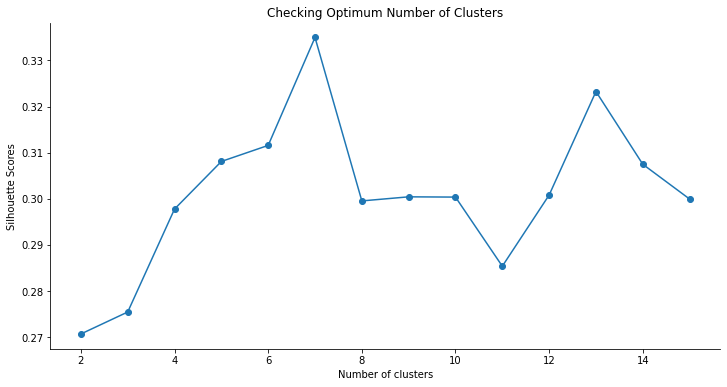

In [29]:
plot(kval, scores)

### We will use k = 7 for our clustering model since it provides the highest silhouette score as seen above.

In [30]:
k = 7

mumbai_clustering = mumbai_grouped.drop('Neighborhood', axis=1)
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=100).fit(mumbai_clustering)

kmeans.labels_

array([4, 1, 1, 1, 1, 5, 6, 1, 0, 1, 1, 5, 1, 5, 1, 5, 0, 1, 5, 1, 2, 5,
       0, 5, 2, 4, 4, 5, 1, 5, 1, 1, 0, 2, 5, 1, 1, 0, 2, 3, 5, 0, 4, 3,
       5, 4, 4, 2, 0, 5])

### Now we can create a new dataframe that includes cluster labels and the top 10 venues.

In [31]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
mumbai_merged = df.rename(columns = {'name':'Neighborhood'})
mumbai_merged = mumbai_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

### Lets view the newly created dataframe.

In [32]:
print(mumbai_merged.shape)
mumbai_merged.head()

(50, 27)


,id,Neighborhood,categories,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4fb64fbfe4b0f1aa6187f374,"Shivaji Park, childrens park facing sealink",Park,19.027400,72.835700,"[{'label': 'display', 'lat': 19.0274, 'lng': 7...",6964,IN,India,[India],...,Indian Restaurant,Café,Dessert Shop,Deli / Bodega,Ice Cream Shop,Fast Food Restaurant,Scenic Lookout,Seafood Restaurant,Hotel,Chinese Restaurant
1,51c03e1c498e83be1ca304e9,"ESSAR Group, Peninsula Techno Park",None,19.071647,72.874108,"[{'label': 'display', 'lat': 19.07164729017205...",594,IN,India,"[LBS Road, Kurla West, Mumbai 400070, Mahārāsh...",...,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bakery,Bar,Seafood Restaurant,Chinese Restaurant
2,5a8da6b05c68381ffe4c60f7,Fabhotels Embassy Park,Hotel,19.074673,72.869735,"[{'label': 'display', 'lat': 19.074673, 'lng':...",818,IN,India,"[Mumbai 400055, Mahārāshtra, India]",...,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bakery,Bar,Vegetarian / Vegan Restaurant,Deli / Bodega
3,522854b811d20ae33ffca752,Save The Children Organisation,Non-Profit,19.068229,72.870630,"[{'label': 'display', 'lat': 19.06822914434509...",1119,IN,India,[India],...,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bakery,Bar,Juice Bar,Seafood Restaurant
4,4f7fbfdee4b04cf7882a66d4,save the children india,None,19.066031,72.871980,"[{'label': 'display', 'lat': 19.06603148925527...",1246,IN,India,[India],...,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bakery,Bar,Juice Bar,Seafood Restaurant


### We can now separate the neighborhoods in each cluster into separate into Dataframes

### Cluster 1

In [34]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 0, 
                  mumbai_merged.columns[[0] + [1] + list(range(5, mumbai_merged.shape[1]))]]

,id,Neighborhood,labeledLatLngs,distance,cc,country,formattedAddress,address,postalCode,city,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,4eb8fe286c2590eb89893bd3,Crescent Business Park,"[{'label': 'display', 'lat': 19.09975420669061...",2671,IN,India,"[Mumbai, Mahārāshtra, India]",NaN,NaN,Mumbai,...,Indian Restaurant,Café,Ice Cream Shop,Bakery,Fast Food Restaurant,Dessert Shop,Coffee Shop,Seafood Restaurant,Italian Restaurant,Chinese Restaurant
16,4f52459ce4b0639bb90a57ad,Akruti Orchid Park,"[{'label': 'display', 'lat': 19.10044596971531...",2868,IN,India,"[Andheri Kurla Road, Saki Naka (Opp. Vijaya Pr...","Andheri Kurla Road, Saki Naka",400072,Mumbai,...,Indian Restaurant,Ice Cream Shop,Bakery,Café,Fast Food Restaurant,Dessert Shop,Coffee Shop,Hotel,Seafood Restaurant,Italian Restaurant
22,4f734487e4b03ea6fdc72ab5,Hotel Royal Park,"[{'label': 'display', 'lat': 19.09686244304630...",2451,IN,India,[India],NaN,NaN,NaN,...,Indian Restaurant,Café,Ice Cream Shop,Fast Food Restaurant,Bakery,Dessert Shop,Coffee Shop,Seafood Restaurant,Italian Restaurant,Chinese Restaurant
32,58ce2cb0460dd91457d28410,Millennium Park,"[{'label': 'display', 'lat': 19.098951, 'lng':...",2725,IN,India,"[Millennium Park (Jagannath Mandir Road), Mumb...",Millennium Park,400072,Mumbai,...,Indian Restaurant,Ice Cream Shop,Bakery,Café,Fast Food Restaurant,Dessert Shop,Coffee Shop,Seafood Restaurant,Italian Restaurant,Chinese Restaurant
37,5d22c6b67226a500232c4915,Nibr Corporate Park,"[{'label': 'display', 'lat': 19.09793, 'lng': ...",2563,IN,India,"[NIBR Corporate Park, Aerocity (Safed Pul, Sak...","NIBR Corporate Park, Aerocity",400072,Mumbai,...,Indian Restaurant,Café,Ice Cream Shop,Fast Food Restaurant,Bakery,Dessert Shop,Coffee Shop,Seafood Restaurant,Italian Restaurant,Chinese Restaurant
41,4f6783cae4b036e3eabec2af,IPM FLOOR - Accn- Logitech Park,"[{'label': 'display', 'lat': 19.10446223811508...",3261,IN,India,"[Logitech Park (Sakinaka Junction), Andheri Ea...",Logitech Park,400058,Andheri East,...,Indian Restaurant,Ice Cream Shop,Café,Bakery,Fast Food Restaurant,Dessert Shop,Coffee Shop,Hotel,Italian Restaurant,Seafood Restaurant
48,55f8195d498e10faf8d19913,kailash park,"[{'label': 'display', 'lat': 19.103824, 'lng':...",3336,IN,India,[India],NaN,NaN,NaN,...,Indian Restaurant,Ice Cream Shop,Café,Bakery,Fast Food Restaurant,Dessert Shop,Coffee Shop,Hotel,Seafood Restaurant,Italian Restaurant


### Cluster 2

In [35]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 1, 
                  mumbai_merged.columns[[0] + [1] + list(range(5, mumbai_merged.shape[1]))]]

,id,Neighborhood,labeledLatLngs,distance,cc,country,formattedAddress,address,postalCode,city,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,51c03e1c498e83be1ca304e9,"ESSAR Group, Peninsula Techno Park","[{'label': 'display', 'lat': 19.07164729017205...",594,IN,India,"[LBS Road, Kurla West, Mumbai 400070, Mahārāsh...","LBS Road, Kurla West",400070,Mumbai,...,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bakery,Bar,Seafood Restaurant,Chinese Restaurant
2,5a8da6b05c68381ffe4c60f7,Fabhotels Embassy Park,"[{'label': 'display', 'lat': 19.074673, 'lng':...",818,IN,India,"[Mumbai 400055, Mahārāshtra, India]",NaN,400055,Mumbai,...,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bakery,Bar,Vegetarian / Vegan Restaurant,Deli / Bodega
3,522854b811d20ae33ffca752,Save The Children Organisation,"[{'label': 'display', 'lat': 19.06822914434509...",1119,IN,India,[India],NaN,NaN,NaN,...,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bakery,Bar,Juice Bar,Seafood Restaurant
4,4f7fbfdee4b04cf7882a66d4,save the children india,"[{'label': 'display', 'lat': 19.06603148925527...",1246,IN,India,[India],NaN,NaN,NaN,...,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bakery,Bar,Juice Bar,Seafood Restaurant
7,4caaf13144a8224b43542940,Tata Communications Corporation Park,"[{'label': 'display', 'lat': 19.06936390057598...",952,IN,India,"[BKC, Mumbai, Mahārāshtra, India]",BKC,NaN,Mumbai,...,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bakery,Bar,Deli / Bodega,Vegetarian / Vegan Restaurant
9,4e2506cb14956d3607792a98,Dani Corporate Park,"[{'label': 'display', 'lat': 19.07160194064452...",1435,IN,India,"[Kalina, Mumbai, Mahārāshtra, India]",Kalina,NaN,Mumbai,...,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Dessert Shop,Café,Seafood Restaurant,Juice Bar,Deli / Bodega,Chinese Restaurant,Coffee Shop
10,5711e80b498e3b954e182f83,Park Bay Apartments,"[{'label': 'display', 'lat': 19.071966, 'lng':...",1512,IN,India,[India],NaN,NaN,NaN,...,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Dessert Shop,Café,Seafood Restaurant,Juice Bar,Deli / Bodega,Chinese Restaurant,Coffee Shop
12,55e2709f498ef3f9e7fa79be,Reliance Jio Park,"[{'label': 'display', 'lat': 19.06327719571813...",2132,IN,India,"[Bandra Kurla Complex, Mumbai, Mahārāshtra, In...",Bandra Kurla Complex,NaN,Mumbai,...,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Dessert Shop,Café,Seafood Restaurant,Juice Bar,Deli / Bodega,Scenic Lookout,Chinese Restaurant
14,5a54b83a1ffed75741a5392a,Hotel Garden Park,"[{'label': 'display', 'lat': 19.060417, 'lng':...",1813,IN,India,"[Sai Nath Nagar, Near Kurla Lion's Garden, (LB...","Sai Nath Nagar, Near Kurla Lion's Garden,",400070,Mumbai,...,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bar,Bakery,Vegetarian / Vegan Restaurant,Deli / Bodega
17,4ef8532030f894d86923a992,Swastik Park Chembur,"[{'label': 'display', 'lat': 19.05585001668581...",2588,IN,India,"[Chembur, Mumbai, Mahārāshtra, India]",Chembur,NaN,Mumbai,...,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Dessert Shop,Bakery,Coffee Shop,Deli / Bodega,Chinese Restaurant,Seafood Restaurant


### Cluster 3

In [36]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 2, 
                  mumbai_merged.columns[[0] + [1] + list(range(5, mumbai_merged.shape[1]))]]


,id,Neighborhood,labeledLatLngs,distance,cc,country,formattedAddress,address,postalCode,city,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,4dae7f33fa8cf04fbe00eaf6,Dog Run @ Kalina Park,"[{'label': 'display', 'lat': 19.07611057678316...",2742,IN,India,"[Vidya Nagari, Kalina (E), Mumbai 400055, Mahā...","Vidya Nagari, Kalina (E)",400055,Mumbai,...,Indian Restaurant,Ice Cream Shop,Café,Dessert Shop,Chinese Restaurant,Fast Food Restaurant,Bakery,Seafood Restaurant,Deli / Bodega,Coffee Shop
24,5304b204498e02cd49299139,kamla nehru park,"[{'label': 'display', 'lat': 19.07938244504951...",2298,IN,India,[India],NaN,NaN,NaN,...,Indian Restaurant,Café,Bakery,Dessert Shop,Fast Food Restaurant,Ice Cream Shop,Chinese Restaurant,Bar,Coffee Shop,Vegetarian / Vegan Restaurant
33,51850d4d498e495edf5a43fe,"Park Hyatt Goa Resort & Spa, Sales & Marketing...","[{'label': 'display', 'lat': 19.077987, 'lng':...",2790,IN,India,[India],NaN,NaN,NaN,...,Indian Restaurant,Ice Cream Shop,Café,Dessert Shop,Bakery,Chinese Restaurant,Fast Food Restaurant,Seafood Restaurant,Deli / Bodega,Coffee Shop
38,4e1f532462840ee807499b11,Rajesh Park View,"[{'label': 'display', 'lat': 19.0809573, 'lng'...",2654,IN,India,"[Off Pipeline Road (Vakola Santacruz East), Mu...",Off Pipeline Road,400055,Mumbai,...,Indian Restaurant,Café,Bakery,Ice Cream Shop,Fast Food Restaurant,Dessert Shop,Chinese Restaurant,Deli / Bodega,Coffee Shop,Vegetarian / Vegan Restaurant
47,4ef2af139a52fadb33d1900f,"Lotus Business Park, Andheri","[{'label': 'display', 'lat': 19.093489, 'lng':...",3243,IN,India,[India],NaN,NaN,NaN,...,Indian Restaurant,Café,Bakery,Ice Cream Shop,Fast Food Restaurant,Dessert Shop,Chinese Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Bar


### Cluster 4

In [37]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 3, 
                  mumbai_merged.columns[[0] + [1] + list(range(5, mumbai_merged.shape[1]))]]


,id,Neighborhood,labeledLatLngs,distance,cc,country,formattedAddress,address,postalCode,city,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
39,4bda5bf163c5c9b62ae72368,Solitaire Corporate Park,"[{'label': 'display', 'lat': 19.11226408185939...",4385,IN,India,"[Mathuradas Vasanji Rd. (Chakala, Andheri-East...",Mathuradas Vasanji Rd.,400093,Mumbai,...,Indian Restaurant,Café,Bakery,Ice Cream Shop,Dessert Shop,Hotel,Bar,Coffee Shop,Italian Restaurant,Seafood Restaurant
43,4d1e96b6756e8cfa84745b54,Park View Hotel,"[{'label': 'display', 'lat': 19.11250903112004...",4709,IN,India,"[Hyderabad, India]",NaN,NaN,Hyderabad,...,Indian Restaurant,Café,Bakery,Ice Cream Shop,Hotel,Dessert Shop,Bar,Seafood Restaurant,Scenic Lookout,Chinese Restaurant


### Cluster 5

In [38]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 4, 
                  mumbai_merged.columns[[0] + [1] + list(range(5, mumbai_merged.shape[1]))]]


,id,Neighborhood,labeledLatLngs,distance,cc,country,formattedAddress,address,postalCode,city,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4fb64fbfe4b0f1aa6187f374,"Shivaji Park, childrens park facing sealink","[{'label': 'display', 'lat': 19.0274, 'lng': 7...",6964,IN,India,[India],NaN,NaN,NaN,...,Indian Restaurant,Café,Dessert Shop,Deli / Bodega,Ice Cream Shop,Fast Food Restaurant,Scenic Lookout,Seafood Restaurant,Hotel,Chinese Restaurant
25,50f2ce4fe4b0d94f9341147e,Reliance Guest House Park,"[{'label': 'display', 'lat': 19.05514590549973...",2405,IN,India,"[Swadeshi Towers (Chunabhatti), India]",Swadeshi Towers,NaN,NaN,...,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Dessert Shop,Café,Seafood Restaurant,Deli / Bodega,Scenic Lookout,Chinese Restaurant,Coffee Shop
26,4fbe53d7e4b0a1f9314b47d5,City park,"[{'label': 'display', 'lat': 19.05841649855552...",3159,IN,India,[India],NaN,NaN,NaN,...,Indian Restaurant,Ice Cream Shop,Café,Dessert Shop,Deli / Bodega,Fast Food Restaurant,Chinese Restaurant,Scenic Lookout,Bakery,Bar
42,4ceba699f3bda1435be2cce4,RNA Corporate Park,"[{'label': 'display', 'lat': 19.06058622340358...",3285,IN,India,"[Mahārāshtra, India]",NaN,NaN,NaN,...,Indian Restaurant,Ice Cream Shop,Café,Dessert Shop,Deli / Bodega,Chinese Restaurant,Seafood Restaurant,Fast Food Restaurant,Hotel,Scenic Lookout
45,4c1e0f17b4e62d7ff1a2dd93,Bhakti Park,"[{'label': 'display', 'lat': 19.02767011619118...",5385,IN,India,"[Near Imax Adlabs (Wadala), Mumbai 400037, Mah...",Near Imax Adlabs,400037,Mumbai,...,Indian Restaurant,Ice Cream Shop,Dessert Shop,Fast Food Restaurant,Deli / Bodega,Café,Bar,Hotel,Scenic Lookout,Chinese Restaurant
46,4b68402ef964a520166e2be3,pathwardhan park,"[{'label': 'display', 'lat': 19.06560889007844...",4890,IN,India,"[near national college, bandra west, Mumbai, M...","near national college, bandra west",NaN,Mumbai,...,Indian Restaurant,Café,Ice Cream Shop,Deli / Bodega,Chinese Restaurant,Juice Bar,Fast Food Restaurant,Pizza Place,Dessert Shop,Restaurant


### Cluster 6

In [39]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 5, 
                  mumbai_merged.columns[[0] + [1] + list(range(5, mumbai_merged.shape[1]))]]


,id,Neighborhood,labeledLatLngs,distance,cc,country,formattedAddress,address,postalCode,city,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,4fc8c65ee4b0c735a35e2beb,Archer Park,"[{'label': 'display', 'lat': 19.0794395, 'lng'...",1126,IN,India,[India],NaN,NaN,NaN,...,Indian Restaurant,Café,Ice Cream Shop,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bakery,Bar,Hotel,Vegetarian / Vegan Restaurant
11,5a69722aad910e700093c965,agastya corporate park,"[{'label': 'display', 'lat': 19.086814, 'lng':...",1504,IN,India,"[109A, 109A/1 to 109/21A, 111 and 110, 110/1 t...","109A, 109A/1 to 109/21A, 111 and 110, 110/1 to...",400070,Mumbai,...,Indian Restaurant,Café,Ice Cream Shop,Bakery,Dessert Shop,Fast Food Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Seafood Restaurant,Hotel
13,5104d387e4b048e6f6f47f28,park avenue,"[{'label': 'display', 'lat': 19.08620834350586...",1661,IN,India,"[Phoenix Marketcity, India]",Phoenix Marketcity,NaN,NaN,...,Indian Restaurant,Café,Ice Cream Shop,Bakery,Dessert Shop,Fast Food Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Seafood Restaurant,Hotel
15,55a07fe9498e694517e1ef67,Mnp Jogging Park,"[{'label': 'display', 'lat': 19.09010314941406...",1895,IN,India,[India],NaN,NaN,NaN,...,Indian Restaurant,Café,Ice Cream Shop,Fast Food Restaurant,Dessert Shop,Bakery,Coffee Shop,Seafood Restaurant,Chinese Restaurant,Hotel
18,4f6d50d7e4b0e4284237952e,Neelkanth Business Park,"[{'label': 'display', 'lat': 19.0799744993393,...",2010,IN,India,"[Vidyavihar (Behind Vidyavihar Bus Depot), Mum...",Vidyavihar,NaN,Mumbai,...,Indian Restaurant,Café,Ice Cream Shop,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bakery,Bar,Hotel,Vegetarian / Vegan Restaurant
21,4cfd21f37f2db1f78d7236d4,Shanti Park,"[{'label': 'display', 'lat': 19.07439747421579...",3572,IN,India,"[Mumbai 400077, Mahārāshtra, India]",NaN,400077,Mumbai,...,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Bakery,Coffee Shop,Dessert Shop,Bar,Italian Restaurant,Hotel
23,5149a8d1e4b031046df2c621,"swimming pool, Naval park","[{'label': 'display', 'lat': 19.08309364318847...",2360,IN,India,[India],NaN,NaN,NaN,...,Indian Restaurant,Café,Ice Cream Shop,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bakery,Bar,Hotel,Vegetarian / Vegan Restaurant
27,4e21c6f9a80968cf3e430b65,Mahinder park,"[{'label': 'display', 'lat': 19.08712869672401...",2666,IN,India,"[Ghatkopar, Mumbai 400086, Mahārāshtra, India]",Ghatkopar,400086,Mumbai,...,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bakery,Bar,Hotel,Vegetarian / Vegan Restaurant
29,50d1c1f3e4b0425b1490ffb0,Naval Park,"[{'label': 'display', 'lat': 19.08443997669828...",2382,IN,India,"[Naval Park, Chirag Nagar (Lbs Marg, Ghatkopar...","Naval Park, Chirag Nagar",400086,Mumbai,...,Indian Restaurant,Café,Ice Cream Shop,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bakery,Bar,Hotel,Vegetarian / Vegan Restaurant
34,531b31ce498eadd2953ce0fc,joggers park,"[{'label': 'display', 'lat': 19.07736352417636...",2728,IN,India,"[Vidyavihar, India]",Vidyavihar,NaN,NaN,...,Indian Restaurant,Café,Ice Cream Shop,Fast Food Restaurant,Dessert Shop,Coffee Shop,Bakery,Bar,Vegetarian / Vegan Restaurant,Chinese Restaurant


### Cluster 7

In [40]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 6, 
                  mumbai_merged.columns[[0] + [1] + list(range(5, mumbai_merged.shape[1]))]]


,id,Neighborhood,labeledLatLngs,distance,cc,country,formattedAddress,address,postalCode,city,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,5358a872498eca6a14a02425,children welfare centre school,"[{'label': 'display', 'lat': 19.04784792608066...",7745,IN,India,[India],NaN,NaN,NaN,...,Indian Restaurant,Pizza Place,Seafood Restaurant,Café,Ice Cream Shop,Pub,Coffee Shop,Hotel,Chinese Restaurant,Restaurant


### Let us view get more insights about the generated clusters by plotting the area with the help of Folium

In [42]:
# create map
map_clusters = folium.Map(location= [latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mumbai_merged['lat'], mumbai_merged['lng'], mumbai_merged['Neighborhood'], mumbai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### We have successfully cluster Mumbai neighbourhood based on Children Parks categories listed by Foursquare

## RESULTS AND DISCUSSION <a name= "results"></a>

Our analysis shows that the central distance between cluster 1 and cluster 3 will be a great place to site Castiel recreation park for children.

## CONCLUSION <a name="conclusion"></a>

Purpose of this project was to identify neighborhood in Mumbai, India close to center with low number of recreation parks (particularly ones that are children oriented) in order to aid stakeholders in narrowing down the search for optimal location for Castiel children park. By children park density distribution from Foursquare data we have first identified general boroughs that justify further analysis, and then generated extensive collection of locations which satisfy some basic requirements regarding existing parks. Clustering of those locations was then performed and information of those clustered parks were created to be used as starting points for the final exploration by stakeholders.

Final decission on the park creation will be made based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like proximity to children schools and availability of good road and water amongst other amenities.